In [1]:
import pandas as pd
from pathlib import Path
import pyarrow
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
sns.set()
from importlib import reload #to prevent error in graphs "str' object is not callable" if it occured,  without restart
plt=reload(plt)

### Make the reprezentation of the most important results

#### 1. Show the number parking zones anf the limit of time for them in public places

In [2]:
TimesLimitsNumbers = pd.read_parquet('spark_results/TimesLimitsNumbers')
TimesLimitsNumbers.head()

,ParkingTimeLimitCategory,count(ParkingTimeLimitCategory)
0,120.0,25
1,240.0,2
2,600.0,2


Text(0.5, 1.0, 'Number of parking zones in public places by time limit')

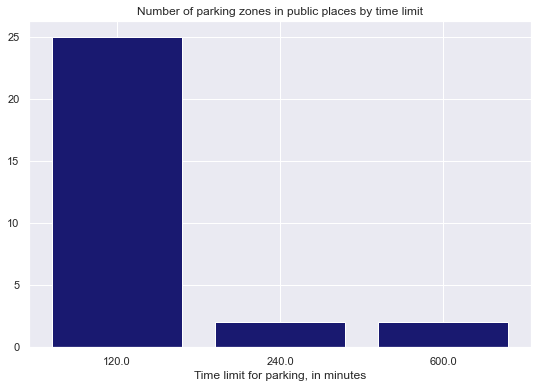

In [3]:
#Make a barplot
plt.figure(figsize=(9,6)) 
plt.bar(x=TimesLimitsNumbers['ParkingTimeLimitCategory'], 
        height=TimesLimitsNumbers['count(ParkingTimeLimitCategory)'], 
        color='midnightblue') 
plt.xlabel("Time limit for parking, in minutes")
plt.title('Number of parking zones in public places by time limit')
#plt.savefig('Car Sales Bar.png.')

There are 120 public places in Seattle but only 29 has parking zones. Other parking zones are outside them. The results of parking zones in public places we can see in the dir "publicLocation_parkingZone". So people need to go to theese places and city authority can think about the transport infrastructure.

In [4]:
publicLocation_parkingZone = pd.read_parquet('spark_results/publicLocation_parkingZone')
publicLocation_parkingZone.head()

,location_id,location_name_primary,location_name_secondary,BlockfaceName,ParkingTimeLimitCategory
0,SOP1,14TH AVE S,BETWEEN DALLAS AVE S AND S CLOVERDALE ST,None,None
1,PIK3,BROADWAY,BETWEEN PIKE ST AND PINE ST,BROADWAY BETWEEN E PIKE ST AND E PINE ST,120.0
2,UPT3,MERCER ST,BETWEEN 5TH AVE N AND TAYLOR AVE N,None,None
3,WES3,CALIFORNIA AVE SW,BETWEEN SW OREGON ST AND SW ALASKA ST,None,None
4,WES4,CALIFORNIA AVE SW,BETWEEN SW OREGON ST AND SW ALASKA ST,None,None


In [5]:
publicLocation_parkingZone['location_id'].count()

120

#### 2. Look at the occcupancy of parking zones and seats in public places

In [6]:
# Seats occupancy by day of week, %
seats_occup_dayweek = pd.read_parquet('spark_results/seats_occup_dayweek')
seats_occup_dayweek.head(7)

,day_of_week,Seats occupancy
0,Wednesday,21.2
1,Tuesday,11.0
2,Friday,13.4
3,Thursday,18.9
4,Saturday,14.8
5,Monday,9.8


In [7]:
# parking zones occupancy by day of week, %
parking_occup_dayweek = pd.read_parquet('spark_results/parking_occup_dayweek')
parking_occup_dayweek.head(7)

,DayWeek,Parking occupancy
0,Wednesday,47.6
1,Tuesday,54.1
2,Friday,48.9
3,Thursday,53.3
4,Saturday,48.9
5,Monday,43.0


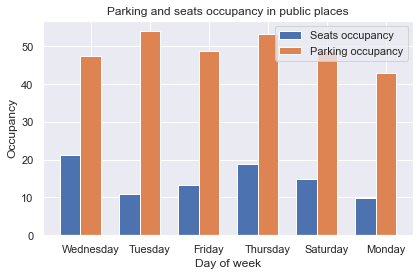

In [8]:
#build a multiple bar to compare occupancy of parking and seats in public places


# data to plot
n_groups = 6 #because we have six days in our datasets

#for first bars take seats_occup_dayweek['Seats occupancy']
#for second bars take parking_occup_dayweek['Parking occupancy']


# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, seats_occup_dayweek['Seats occupancy'], bar_width,
label='Seats occupancy')

rects2 = plt.bar(index + bar_width, parking_occup_dayweek['Parking occupancy'], bar_width,
label='Parking occupancy')

plt.xlabel('Day of week')
plt.ylabel('Occupancy')
plt.title('Parking and seats occupancy in public places')
plt.xticks(index + bar_width, seats_occup_dayweek['day_of_week'])
          
plt.legend()

plt.tight_layout()
plt.show()

The plot shows that parking occupancy is higher than seats occupancy. It tells us that people go to public places both for work and rest. Monday is the least occupied day in both category while in even day of the week the occupancy of parking places more than 50% but the highest seats occupancy is on Wednesday and Thursday.

#### 3. Represent how many people stay in public places by age

In [9]:
public_staying_age = pd.read_parquet('spark_results/public_staying_age')

In [10]:
public_staying_age.head()

,staying_age,count
0,25-44,5657
1,15-24,1004
2,5-14,176
3,65+,605
4,45-64,2859


Text(0.5, 1.0, 'Number of people staying in public places by age')

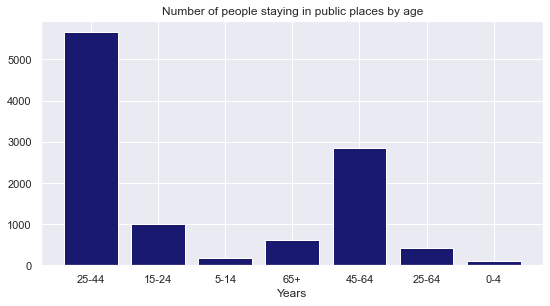

In [11]:
#Make a barplot
plt.figure(figsize=(9,4.5)) 
plt.bar(x=public_staying_age['staying_age'], 
        height=public_staying_age['count'], 
        color='midnightblue') 
plt.xlabel("Years")
plt.title('Number of people staying in public places by age')
#plt.savefig('Car Sales Bar.png.')

The most number of people are adults in age of 25-44 year, the second place is age 45-64 that is a half of the biggest group.\
The number of people in age 15-24  is twice bigger than in age 65+. The number of children is the less. \
We see that data has errors because there is a group 25-64.So it includes people from other two groups of adults.

#### 4. Represent how many people there are in public places  during the day.

In [12]:
TimesGender= pd.read_parquet('spark_results/TimesGender')
TimesGender.head()

,staying_time_of_day,count(staying_gender)
0,Evening,4534
1,Morning,2008
2,Early Evening,86
3,Midday,4192


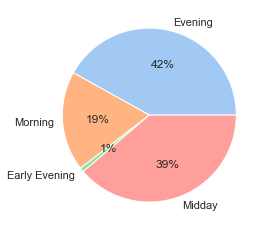

In [13]:
data = TimesGender['count(staying_gender)']
labels = TimesGender['staying_time_of_day']
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:4]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')

plt.show()

The most preferable time of day in public places for people is Midday and Evening, the less preferable is Early Evening